# Traders@SMU L1 Week 3 Economic Analysis with Python Libraries for Assets Data Presentation Mini Project - Created by Julian Cabrera 

## Your Goal for this Mini Project Assigment is to analyze Economic Events from the Dow Jones Industrial Average(DJIA) and Sectors of the S&P500 ETF.

## You will gather and manupulate Data/Prices using **yfinance, pandas, numpy, & matplotlib.** 

## Then you will make Economic conclusions and insights on the data. 

### **Refer to the Week 3 Asset Class Lecture Notebook as Guide for help & troubelshooting**

## Part 1 : Analyzing the DJIA as an Economic Indicator 

### Step 1 - Import all Necessary Libraries & run cell: yfinance, numpy, pandas, matplotlib.pyplot. **Use alias**

In [1]:
# Import here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf


### Step 2 - Extract DJIA data from your the yfinance libary and set into into a dataframe(df) 

In [3]:
# Complete Step 1 Here
df = yf.download('DJIA', start = '2000-01-01', end = '2025-03-09', interval = '1d')
df.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,DJIA,DJIA,DJIA,DJIA,DJIA
Date,,,,,
2022-02-24,18.260336,18.260336,17.843117,17.941198,22700
2022-02-25,18.545519,18.545519,18.250524,18.416506,26800
2022-02-28,18.558350,18.612672,18.439145,18.612672,4100
2022-03-01,18.312391,18.695661,18.273159,18.695661,8300
2022-03-02,18.605120,18.642842,18.424048,18.597575,14300


### Step 3 - Now create a dataframe to just show DJIA Closing Prices 


In [9]:
# Only Show Closing Prices 
df_new = df[['Close']]
df_new.head()


Price,Close
Ticker,DJIA
Date,
2022-02-24,18.260336
2022-02-25,18.545519
2022-02-28,18.558350
2022-03-01,18.312391
2022-03-02,18.605120


### Step 4 - Show the first 5 trading days of the DJIA Dataframe to validate Dataframe

In [11]:
# Use the head method 
df.head()


Price,Close,High,Low,Open,Volume
Ticker,DJIA,DJIA,DJIA,DJIA,DJIA
Date,,,,,
2022-02-24,18.260336,18.260336,17.843117,17.941198,22700
2022-02-25,18.545519,18.545519,18.250524,18.416506,26800
2022-02-28,18.558350,18.612672,18.439145,18.612672,4100
2022-03-01,18.312391,18.695661,18.273159,18.695661,8300
2022-03-02,18.605120,18.642842,18.424048,18.597575,14300


### Step 5 - Using Matplotlib.pyploy, plot a Line Plot of Historical Closing Prices of the DJIA Dataframe 

#### Include a title, xlabel, & ylabel

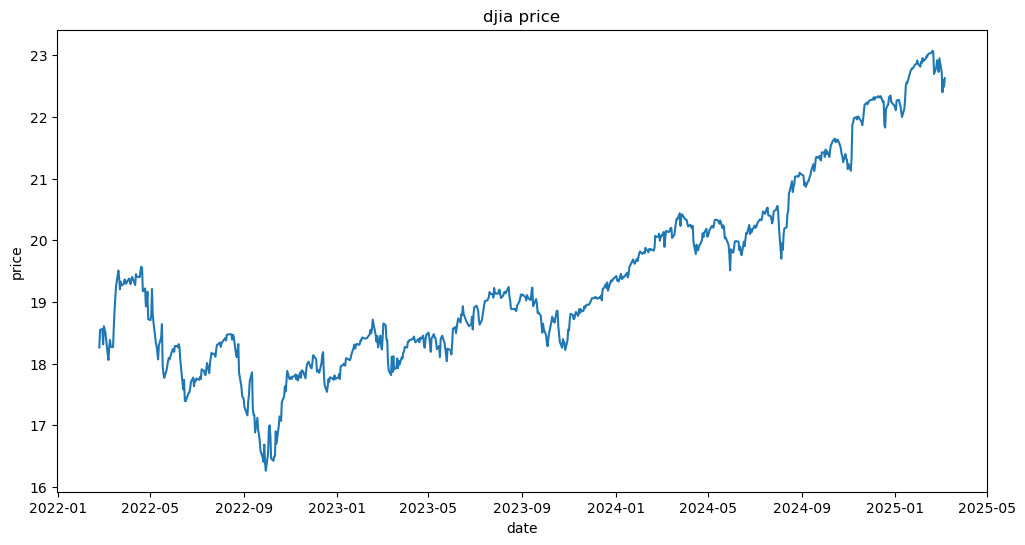

In [25]:
# Plot a Line Plot of Historical Prices of the DJIA Dataframe 
plt.figure(figsize = (12, 6))
plt.plot(df.index, df['Close'])
plt.title('djia price')
plt.xlabel('date')
plt.ylabel('price')
plt.show()


### Step 6 - Compute Daily Returns/Changes of DJIA 

#### 1. Use the .values & .flatten() methods to initialize and manipulate numpy array

#### 2. Use the daily returns formula to calculate changes 

#### 3. Print daily returns

In [15]:
# Compute Daily Returns here 
closing_prices = df['Close'].values
closing_prices = closing_prices.flatten()
daily_returns = np.diff(closing_prices) / closing_prices[:-1]
print(daily_returns)


[ 1.56176181e-02  6.91850918e-04 -1.32532436e-02  1.59852648e-02
 -3.04107637e-03 -2.44057010e-03 -1.92864829e-02 -4.86464919e-03
  1.14897427e-02  6.36081685e-03 -5.95132047e-03 -3.71503054e-04
  1.81741801e-02  1.42395964e-02  1.15595293e-02  9.60849674e-03
  1.26429662e-02 -6.24250975e-03 -9.34441417e-03  6.45995948e-03
 -3.15008898e-03  1.18533800e-03  3.74797281e-03 -7.86178391e-04
 -2.75364146e-03  1.14406014e-03  3.19117633e-03 -1.88501182e-03
 -2.75480409e-03  3.86728072e-03  2.16201520e-03 -4.90289168e-03
 -1.89209329e-03  9.20169353e-03 -2.15267773e-03 -3.55360579e-04
  5.53590241e-03  3.14559395e-03 -1.17616685e-03 -1.92303545e-02
  2.40088323e-03 -1.51696706e-02  1.21581135e-03  1.13360744e-02
 -2.32185321e-02 -8.19442199e-04  4.10138700e-03  2.28761054e-02
 -2.19650454e-02 -6.53307062e-03 -1.72630045e-02 -3.34535834e-03
 -5.45523689e-03 -6.32943395e-03  1.27385516e-02  6.70879977e-03
  1.19533443e-02 -3.69182502e-02 -6.41015901e-03 -3.87063052e-03
  6.87152640e-03  3.97429

### Step 7 - Create an New Dataframe with Closing Prices, 50 Day rolling Moving Average of Prices , & 200 Day rolling Moving Average of Prices

#### First, multiply the Daily Returns Array by 100 to get in percent form

#### Second, initialize a New Dataframe using the Daily Returns Array & the pdf.DataFrame method 

#### Third, add in columns in the New Dataframe that represent 50 Day rolling Moving Average, & 200 Day rolling Moving Average using the .rolling, .mean() & the .shift(1) methods.

#### &nbsp;&nbsp;&nbsp;&nbsp;      **Hint for Rolling Moving Average Initialization is shown in cell below.**


In [7]:
# df['x Day MA'] = df['Close'].rolling(window= #_days).mean().shift(1)

In [17]:
# Multiply the daily Returns by 100 to get in percent form Now Create 50 Day and 200 Day moving Averages for the DJIA Prices and return 50 Day 200 Day and Daily Returns into a Dataframe
daily_returns = daily_returns * 100
returns_df = pd.DataFrame({'Daily Return (%)': daily_returns.round(2)}, index = df.index[1:])
returns_df['50day mean %'] = returns_df['Daily Return (%)'].rolling(window = 50).mean().shift(1)
returns_df['200day mean %'] = returns_df['Daily Return (%)'].rolling(window = 200).mean().shift(1)
print(returns_df)


            Daily Return (%)  50day mean %  200day mean %
Date                                                     
2022-02-25              1.56           NaN            NaN
2022-02-28              0.07           NaN            NaN
2022-03-01             -1.33           NaN            NaN
2022-03-02              1.60           NaN            NaN
2022-03-03             -0.30           NaN            NaN
...                      ...           ...            ...
2025-03-03             -0.96        0.0556        0.06220
2025-03-04             -1.45        0.0448        0.05740
2025-03-05              0.89        0.0150        0.05035
2025-03-06             -0.49        0.0676        0.05545
2025-03-07              0.62        0.0612        0.05365

[760 rows x 3 columns]


### Step 8 - Using Matplotlib.pyplot Make a Plot having 50 days MA, 200 MA, and Closing Prices all on the same plot. Make sure each line is a different color to differentiate

#### Include a title, xlabel, ylabel, & legend

#### &nbsp;&nbsp; **Hint: You should use the plt.plot() method twice to graph two seperate Rolling Moving Averages**

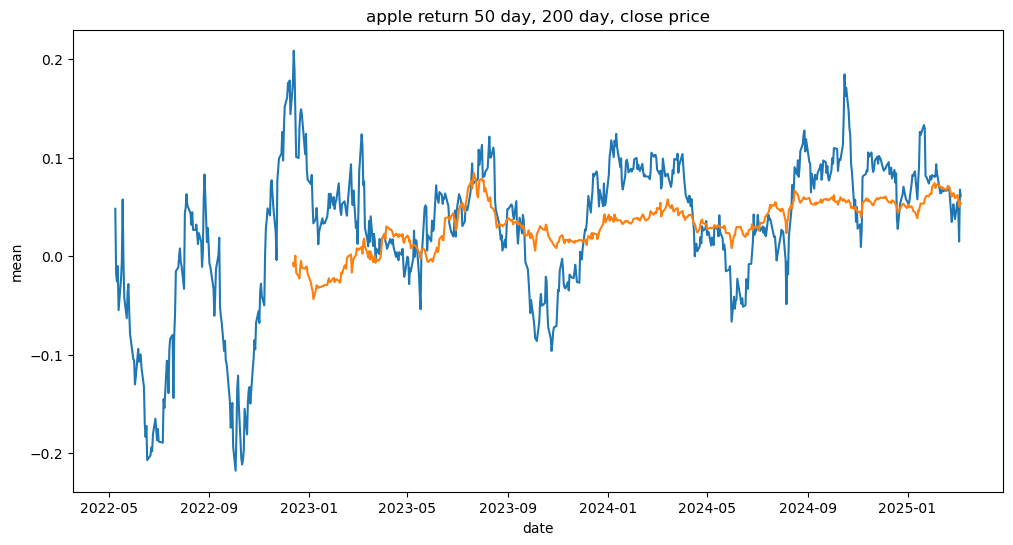

In [27]:
# Plot in this Cell
plt.figure(figsize = (12, 6))
plt.plot(returns_df.index, returns_df['50day mean %'])
plt.plot(returns_df.index, returns_df['200day mean %'])
# plt.plot(df.index, df['Close'])
plt.title('apple return 50 day, 200 day, close price')
plt.xlabel('date')
plt.ylabel('mean')
plt.show()


## Read:

### Golden Cross (Bullish Signal): Occurs when the 50-Day Moving Average(Short-Term) crosses above the the 200 day Moving Average(Long-Term). This is an indicator of a potential long-term uptrend. It often suggests increasing bullish momemntun as short-term buying pressure increases often signaling economic recovery, positive corporate earnings, or supportive monetary policy.

### Death Cross (Bearish Signal): Occurs when the 50-day Moving Average(Short-Term Trend) crosses below the 200-day Moving Average(Long-Term Trend). This is an indicator of a Potential long-term downtrend. It often suggests bearish sentiment, often due to economic slowdowns, recessions, or financial crise signalling panic selling events and market corrections.



### Step 9 - Identify 2 Historic Financial Events that are represented by each a Golden Cross & Death Cross. Go into detail descrbing dates, price levels, and Macroeconomic indicators like umemployment rate, GDP, Inflation, & Interest Rates. Answer  should be at least 5 sentences. 

#### Answer Below using # Comments & conduct your own online Research to answer if needed.

In [31]:
# Answer here 
# golden cross: post-pandemic recovery. The S&P 500 had bottomed during the pandemic, with the 50-day MA crossing above the 200-day MA as 
# prices climbed. After GDP plummeted, it was finally begenning to increase back up again. 
# Death cross: before 2008 financial crisis. The S&P 500 peaked at the end of 2007 and fell sharply, with the 50-day MA crossing below the 
# 200-day MA. Unemployment rate grew, GDP growth turned negative, and the Fed cut interest rates sharply to near-zero.


## Part 2 : Analyzing & Comparing the S&P 500 ETF Tech Sector(XLK) vs Finance Sector(XLF)

### Step 1 - Use yfinance to import both datasets & prices for XLK and XLF by creating two different Dataframe(df) for each 

In [35]:
# import data and create dataframes here
xlk = yf.download("XLK")
xlf = yf.download("XLf")
xlk.head()



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,XLK,XLK,XLK,XLK,XLK
Date,,,,,
1998-12-22,24.024996,24.364696,23.825861,24.294413,300500
1998-12-23,24.598970,24.598970,24.106991,24.552115,338300
1998-12-24,24.505262,24.598973,24.411552,24.598973,243700
1998-12-28,24.575546,24.880105,24.434981,24.880105,309300
1998-12-29,24.645823,24.751247,24.364691,24.692678,123800


In [37]:
xlf.head()

Price,Close,High,Low,Open,Volume
Ticker,XLF,XLF,XLF,XLF,XLF
Date,,,,,
1998-12-22,11.377016,11.445644,11.323639,11.445644,55887
1998-12-23,11.544777,11.544777,11.331267,11.331267,78784
1998-12-24,11.621021,11.621021,11.506641,11.544768,43824
1998-12-28,11.468516,11.613396,11.438014,11.613396,51948
1998-12-29,11.590520,11.590520,11.346508,11.483765,100819


### Step 2 - Print out the first 5 Trading Days of XLF using the .head() method 

In [39]:
# print here
xlk.head()



Price,Close,High,Low,Open,Volume
Ticker,XLK,XLK,XLK,XLK,XLK
Date,,,,,
1998-12-22,24.024996,24.364696,23.825861,24.294413,300500
1998-12-23,24.598970,24.598970,24.106991,24.552115,338300
1998-12-24,24.505262,24.598973,24.411552,24.598973,243700
1998-12-28,24.575546,24.880105,24.434981,24.880105,309300
1998-12-29,24.645823,24.751247,24.364691,24.692678,123800


### Step 3 - Print out the first 5 Trading Days of XLF using the .head() method 

In [41]:
# print here
xlf.head()


Price,Close,High,Low,Open,Volume
Ticker,XLF,XLF,XLF,XLF,XLF
Date,,,,,
1998-12-22,11.377016,11.445644,11.323639,11.445644,55887
1998-12-23,11.544777,11.544777,11.331267,11.331267,78784
1998-12-24,11.621021,11.621021,11.506641,11.544768,43824
1998-12-28,11.468516,11.613396,11.438014,11.613396,51948
1998-12-29,11.590520,11.590520,11.346508,11.483765,100819


### Step 4 - Using Matplotlib.pyplt, plot the Closing Prices of each XLK and XLF on a the same Line Plot for Further Analysis

#### Include a title, xlabel, ylabel, legend, & grid

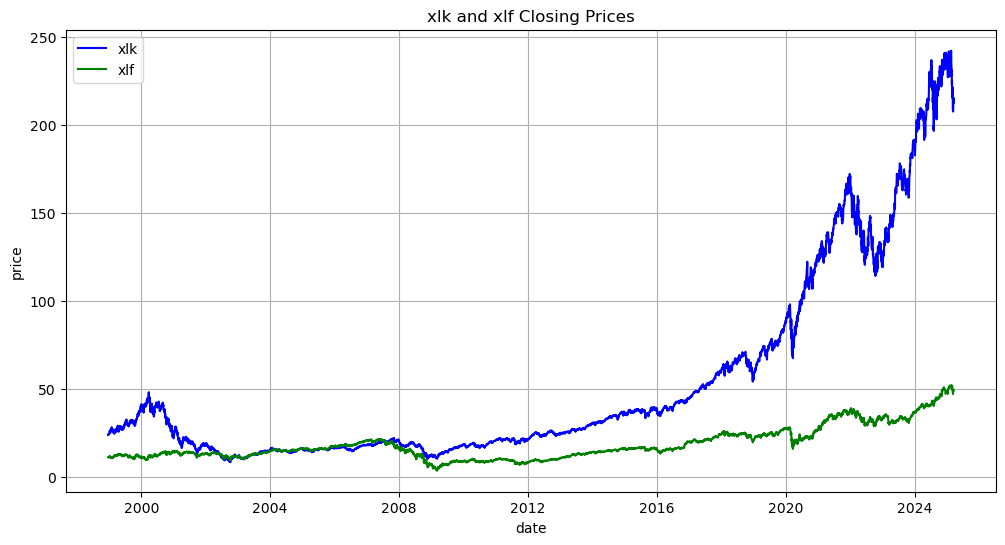

In [45]:

plt.figure(figsize=(12, 6))
plt.plot(xlk['Close'], label='xlk', color='blue')
plt.plot(xlf['Close'], label='xlf', color='green')
plt.title('xlk and xlf Closing Prices')
plt.xlabel('date')
plt.ylabel('price')
plt.legend()
plt.grid(True)

plt.show()

### Step 5 - How did both Sectors perform during the Dot-com bubble (1999-2002)? What do you think caused both Sector's Price Behavior? Be Specifc with Dates, Company Names, and write at least 3 sentences 

#### Answer below in # Comments & conduct your own online Research to answer if needed.


In [15]:
# Answer here 
# XLK surged around 2000 because of the rise of internet, computers, and phones. Thus, companies like Microsoft, Intel, and Apple all went
# through an giant increase in market value. Then, the bubble crashed and all those value gained were gone shortly after because the market
# realised so.
# XLF was steadily increasing overall. They may have had a little fall because of the business and economic environment, but JP, Citi, and 
# Goldman had nothing to do with the tech companies.


### Step 6 - What specific trends have caused the increasing Divergence in XLF and XLK? Be specific and write at least 3 sentences 

#### Answer below in # Comments & conduct your own online Research to answer if needed.

In [16]:
# Answer here 
# I think the invention of AI, cloud computing, and softwares is definitely a reason. Because of them, investors have very much favoured high
# potential tech stocks. Nvidia, Apple, and etc. are all being valued very high for that reason. However, finance companies typically tend to
# be more steady. And their profitability largely depends on the macroeconomic factors, like inflation and interest rates, which makes them
# more prone to be affected by the government policies.
